In [7]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.subplots as sp
import plotly.express as px

In [8]:
data = pd.read_csv("car_data.csv")

In [9]:
data.head(10)

car_brand         car_model  car_price   car_city  car_fuel  \
0           Ford         Focus         550000  Astrakhan  gasoline   
1  Mercedes-Benz     GLA-Class        1820000  Astrakhan  gasoline   
2          Haval            F7        2600000  Astrakhan  gasoline   
3         Toyota         Camry        4200000  Astrakhan  gasoline   
4          OMODA            C5        2125000  Astrakhan  gasoline   
5  Mercedes-Benz       E-Class        3779999  Astrakhan  gasoline   
6         Toyota          RAV4        2539000  Astrakhan  gasoline   
7           Ford         Focus         555000  Astrakhan  gasoline   
8          Honda         Civic         455000  Astrakhan  gasoline   
9            Kia  Rio X (X-Line)      1950000  Astrakhan  gasoline   

  car_transmission car_drive  car_mileage car_country  car_engine_capacity  \
0           manual       FWD       300000         USA                  1.8   
1            robot       FWD        88000          DE                  1.6   
2            robot       4WD        19000          CN                  1.5   
3        automatic       FWD        30000          JP                  3.5   
4              CVT       FWD        18824          CN                  1.5   
5        automatic       4WD       125000          DE                  2.0   
6              CVT       FWD        68023          JP                  2.0   
7           manual       FWD       261000         USA                  1.8   
8        automatic       FWD       250000          JP                  1.5   
9        automatic       FWD        40000          KR                  1.6   

   car_engine_hp  car_age  price_per_hp  age_to_mileage_ratio  
0            125       14   4400.000000              0.000047  
1            156       10  11666.666667              0.000114  
2            150        2  17333.333333              0.000105  
3            249        2  16867.469880              0.000067  
4            147        2  14455.782313              0.000106  
5            184        6  20543.472826              0.000048  
6            146        9  17390.410959              0.000132  
7            125       18   4440.000000              0.000069  
8            105       22   4333.333333              0.000088  
9            123        5  15853.658537              0.000125

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42092 entries, 0 to 42091
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_brand             42092 non-null  object 
 1   car_model             42092 non-null  object 
 2   car_price             42092 non-null  int64  
 3   car_city              42089 non-null  object 
 4   car_fuel              42092 non-null  object 
 5   car_transmission      42092 non-null  object 
 6   car_drive             42089 non-null  object 
 7   car_mileage           42092 non-null  int64  
 8   car_country           42092 non-null  object 
 9   car_engine_capacity   42089 non-null  float64
 10  car_engine_hp         42092 non-null  int64  
 11  car_age               42092 non-null  int64  
 12  price_per_hp          42091 non-null  float64
 13  age_to_mileage_ratio  42091 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 4.5+ MB


In [11]:
data.columns

Index(['car_brand', 'car_model', 'car_price', 'car_city', 'car_fuel',
       'car_transmission', 'car_drive', 'car_mileage', 'car_country',
       'car_engine_capacity', 'car_engine_hp', 'car_age', 'price_per_hp',
       'age_to_mileage_ratio'],
      dtype='object')

Проверим все ли удалилось корректно.

In [12]:
data

car_brand      car_model  car_price   car_city  car_fuel  \
0               Ford      Focus         550000  Astrakhan  gasoline   
1      Mercedes-Benz  GLA-Class        1820000  Astrakhan  gasoline   
2              Haval         F7        2600000  Astrakhan  gasoline   
3             Toyota      Camry        4200000  Astrakhan  gasoline   
4              OMODA         C5        2125000  Astrakhan  gasoline   
...              ...            ...        ...        ...       ...   
42087          Mazda    Tribute         550000    Yakutsk  gasoline   
42088          Lexus      GX460        4000000    Yakutsk  gasoline   
42089            BMW             x5    1000000        NaN  gasoline   
42090           Ford           Golf    1000000        NaN  gasoline   
42091         Toyota          Camry  100000000        NaN       gas   

      car_transmission car_drive  car_mileage car_country  \
0               manual       FWD       300000         USA   
1                robot       FWD        88000          DE   
2                robot       4WD        19000          CN   
3            automatic       FWD        30000          JP   
4                  CVT       FWD        18824          CN   
...                ...       ...          ...         ...   
42087        automatic       4WD       190000          JP   
42088        automatic       4WD       217000          JP   
42089        automatic       NaN       100000         GER   
42090        automatic       NaN         9998         GER   
42091        automatic       NaN          100         JAP   

       car_engine_capacity  car_engine_hp  car_age  price_per_hp  \
0                      1.8            125       14   4400.000000   
1                      1.6            156       10  11666.666667   
2                      1.5            150        2  17333.333333   
3                      3.5            249        2  16867.469880   
4                      1.5            147        2  14455.782313   
...                    ...            ...      ...           ...   
42087                  2.0            129       23   4263.565891   
42088                  4.6            296       13  13513.513514   
42089                  NaN            297       15   3367.003367   
42090                  NaN            400        8   2500.000000   
42091                  NaN           1000     1000           NaN   

       age_to_mileage_ratio  
0                  0.000047  
1                  0.000114  
2                  0.000105  
3                  0.000067  
4                  0.000106  
...                     ...  
42087              0.000121  
42088              0.000060  
42089              0.000150  
42090              0.000800  
42091                   NaN  

[42092 rows x 14 columns]

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [13]:
data.isnull().sum()

car_brand               0
car_model               0
car_price               0
car_city                3
car_fuel                0
car_transmission        0
car_drive               3
car_mileage             0
car_country             0
car_engine_capacity     3
car_engine_hp           0
car_age                 0
price_per_hp            1
age_to_mileage_ratio    1
dtype: int64

Проверяем датасет на наличие дубликатов, в случае наличия удаляем их.

In [14]:
data.duplicated().sum()

np.int64(172)

In [15]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

np.int64(0)

Добавим два новых столбца: price_per_hp — стоимость автомобиля за одну лошадиную силу и age_to_mileage_ratio — отношение возраста автомобиля к пробегу.

In [16]:
data['price_per_hp'] = data['car_price'] / data['car_engine_hp']
data['age_to_mileage_ratio'] = data['car_age'] / data['car_mileage']


In [17]:
data

car_brand      car_model  car_price   car_city  car_fuel  \
0               Ford      Focus         550000  Astrakhan  gasoline   
1      Mercedes-Benz  GLA-Class        1820000  Astrakhan  gasoline   
2              Haval         F7        2600000  Astrakhan  gasoline   
3             Toyota      Camry        4200000  Astrakhan  gasoline   
4              OMODA         C5        2125000  Astrakhan  gasoline   
...              ...            ...        ...        ...       ...   
41915          Mazda    Tribute         550000    Yakutsk  gasoline   
41916          Lexus      GX460        4000000    Yakutsk  gasoline   
41917            BMW             x5    1000000        NaN  gasoline   
41918           Ford           Golf    1000000        NaN  gasoline   
41919         Toyota          Camry  100000000        NaN       gas   

      car_transmission car_drive  car_mileage car_country  \
0               manual       FWD       300000         USA   
1                robot       FWD        88000          DE   
2                robot       4WD        19000          CN   
3            automatic       FWD        30000          JP   
4                  CVT       FWD        18824          CN   
...                ...       ...          ...         ...   
41915        automatic       4WD       190000          JP   
41916        automatic       4WD       217000          JP   
41917        automatic       NaN       100000         GER   
41918        automatic       NaN         9998         GER   
41919        automatic       NaN          100         JAP   

       car_engine_capacity  car_engine_hp  car_age   price_per_hp  \
0                      1.8            125       14    4400.000000   
1                      1.6            156       10   11666.666667   
2                      1.5            150        2   17333.333333   
3                      3.5            249        2   16867.469880   
4                      1.5            147        2   14455.782313   
...                    ...            ...      ...            ...   
41915                  2.0            129       23    4263.565891   
41916                  4.6            296       13   13513.513514   
41917                  NaN            297       15    3367.003367   
41918                  NaN            400        8    2500.000000   
41919                  NaN           1000     1000  100000.000000   

       age_to_mileage_ratio  
0                  0.000047  
1                  0.000114  
2                  0.000105  
3                  0.000067  
4                  0.000106  
...                     ...  
41915              0.000121  
41916              0.000060  
41917              0.000150  
41918              0.000800  
41919             10.000000  

[41920 rows x 14 columns]

Теперь в нашем датасете присутствуют еще два дополнительных столбца.

Построим графики для двух новых столбцов.

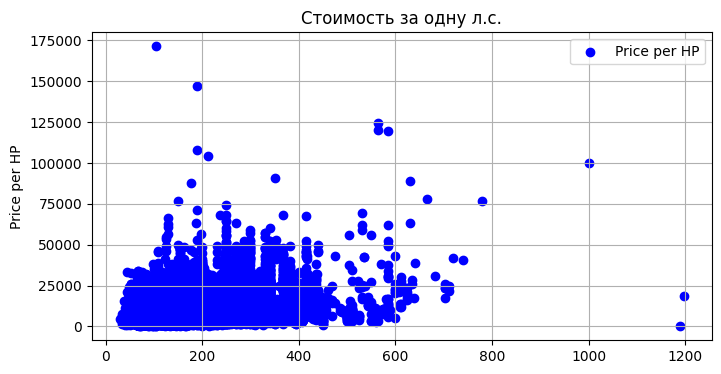

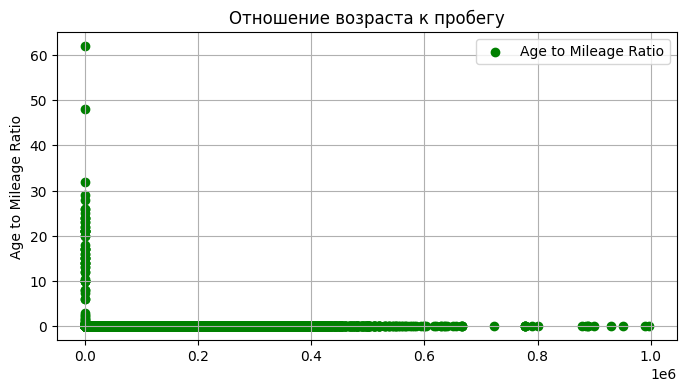

In [18]:
plt.figure(figsize=(8, 4))
plt.scatter(data["car_engine_hp"], data["price_per_hp"], label="Price per HP", color='blue')
plt.title("Стоимость за одну л.с.")
plt.ylabel("Price per HP")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(data['car_mileage'], data["age_to_mileage_ratio"], label="Age to Mileage Ratio", color='green')
plt.title("Отношение возраста к пробегу")
plt.ylabel("Age to Mileage Ratio")
plt.legend()
plt.grid()
plt.show()

Найдем самую продаваемую популярную для продажи машину.

In [19]:
inf_model = data[['car_brand', 'car_model']]

In [20]:
inf_model

car_brand      car_model
0               Ford      Focus    
1      Mercedes-Benz  GLA-Class    
2              Haval         F7    
3             Toyota      Camry    
4              OMODA         C5    
...              ...            ...
41915          Mazda    Tribute    
41916          Lexus      GX460    
41917            BMW             x5
41918           Ford           Golf
41919         Toyota          Camry

[41920 rows x 2 columns]

Теперь посчитаем количество продаваемых машин каждой модели.

In [21]:
model_counts = inf_model[['car_brand', 'car_model']].value_counts().reset_index()
model_counts.columns = ['car_brand', 'car_model', 'count']
model_counts

car_brand    car_model  count
0        Hyundai  Solaris       1008
1            Kia      Rio        873
2         Toyota    Camry        798
3           Lada   Granta        703
4     Volkswagen     Polo        584
...          ...          ...    ...
1415         ZAZ   Tavria          1
1416         ZAZ  Slavuta          1
1417      Vortex    Corda          1
1418       Volvo      V50          1
1419       Acura      TSX          1

[1420 rows x 3 columns]

Теперь на основе этих данных посторим график для 10 самых популярных для продажи машин.

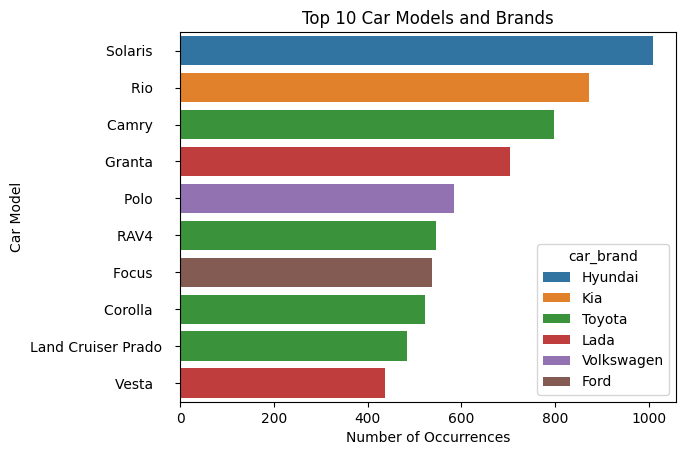

In [22]:
top_models = model_counts.nlargest(10, 'count')
sns.barplot(data=top_models, x='count', y='car_model', hue='car_brand', dodge=False)


plt.title('Top 10 Car Models and Brands')
plt.xlabel('Number of Occurrences')
plt.ylabel('Car Model')

plt.show()

Эта диаграмма показывает, что Hyundai Solaris самая продаваемая машина.

Узнаем какую часть авто-рынка занимают страны производители.

Для начала соберем данные которые покажут сколько машин продается из той или иной страны.

In [23]:
inf_about_country = data['car_country'].value_counts()
inf_about_country

car_country
JP     18461
KR      6207
DE      5663
RUS     4346
USA     2134
CN      1725
FR      1640
CZ       935
UK       394
SE       170
KR       137
IT        52
ES        22
UZ        21
IR         5
UKR        5
GER        2
JAP        1
Name: count, dtype: int64

Дополним данные столбцом содержащим процентное соотношение количества машин из конкретных стран. А также добавим столбец с заголовком count, в котором будет хранится количество машин из каждой страны. 

In [24]:
inf_about_country = data['car_country'].value_counts().reset_index()
inf_about_country.columns = ['car_country', 'count']
inf_about_country['percentage'] = (inf_about_country['count'] / inf_about_country['count'].sum()) * 100
inf_about_country

car_country  count  percentage
0           JP  18461   44.038645
1           KR   6207   14.806775
2           DE   5663   13.509065
3          RUS   4346   10.367366
4          USA   2134    5.090649
5           CN   1725    4.114981
6           FR   1640    3.912214
7           CZ    935    2.230439
8           UK    394    0.939885
9           SE    170    0.405534
10         KR     137    0.326813
11          IT     52    0.124046
12          ES     22    0.052481
13          UZ     21    0.050095
14          IR      5    0.011927
15         UKR      5    0.011927
16         GER      2    0.004771
17         JAP      1    0.002385

Теперь нарисуем график в виде карты, но для начала нужно преобразовать все двухбуквенные записи в трехбуквенне, для правильной отрисовки.

In [25]:
corrections_countries = {
    "JP": "JPN",
    "KR": "KOR",
    "DE": "DEU",
    "RUS": "RUS",
    "USA": "USA",
    "CN": "CHN",
    "FR": "FRA",
    "CZ": "CZE",
    "UK": "GBR",
    "SE": "SWE",
    "IT": "ITA",
    "ES": "ESP",
    "UZ": "UZB",
    "IR": "IRN",
    "UKR": "UKR",
}

Теперь заменим все аббревиатуры на те которые ма переделали.

In [26]:
inf_about_country['car_country'] = inf_about_country['car_country'].replace(corrections_countries)

Теперь уже рисуем график.

In [27]:
fig = px.choropleth(
    inf_about_country,
    locations="car_country",
    locationmode="ISO-3",
    color="percentage",
    hover_name="car_country",
    title="Car Country Distribution",
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.show()

На этой диаграмме отчетливо видно, что Япония лидирует по прадажам машин на рынке.

Посчитаем количество машин по бренду и узнаем кто занимает большую часть авто-рынка.

In [28]:
inf_about_cars_brand = data['car_brand'].value_counts().reset_index()
inf_about_cars_brand.columns = ["car_brand", "count"]

In [29]:
inf_about_cars_brand

car_brand  count
0      Toyota   8270
1        Lada   3913
2         Kia   3175
3      Nissan   3090
4     Hyundai   2779
..        ...    ...
107    Hongqi      1
108   Changhe      1
109       BAW      1
110  Maserati      1
111    Tianma      1

[112 rows x 2 columns]

Добавим в наш собранный датаспет столбик, где будут храниться процентные значение от общего количества.

In [30]:
inf_about_cars_brand['percentage'] = (inf_about_cars_brand['count'] / inf_about_cars_brand['count'].sum()) * 100
inf_about_cars_brand

car_brand  count  percentage
0      Toyota   8270   19.728053
1        Lada   3913    9.334447
2         Kia   3175    7.573950
3      Nissan   3090    7.371183
4     Hyundai   2779    6.629294
..        ...    ...         ...
107    Hongqi      1    0.002385
108   Changhe      1    0.002385
109       BAW      1    0.002385
110  Maserati      1    0.002385
111    Tianma      1    0.002385

[112 rows x 3 columns]

Теперь по собранным данным  нарисуем график, показывающий какую часть авто-рынка занимает каждый авто бренд из нашего датасета.

In [31]:
fig = go.Figure(go.Treemap(
    labels=inf_about_cars_brand['car_brand'],
    parents=[""] * len(inf_about_cars_brand['car_brand']),
    values=inf_about_cars_brand['count'],
    textinfo="label+value",
    customdata=inf_about_cars_brand['percentage'],
    hovertemplate=(
        "<b>%{label}</b><br>"
        "Количество: %{value}<br>" 
        "Процент: %{customdata:.2f}%<extra></extra>"
    ),
    marker=dict(
        colorscale="RdYlGn",
        reversescale=True
    )
))

fig.update_layout(
    title="Информация по количеству брендов машин, занимающих авто-рынок",
    title_font_size=20
)

fig.show()


Данный график показывает какое количество машин конкретной марки размещено на рынке и  процент рынка занимаемый ими. И лидирует по продажам Toyota. 

Далее постараемся определить как образуются цены на машины.
1) Зависимость цены от возраста машины.
2) Зависимость цены от пробега машины.
3) Зависимость цены от мощности двигателя.
4) Зависимость цены от вида топлива.

Соберем датасет для каждой из ситуаций.

In [32]:
price_and_age = data[['car_price', 'car_age']]
price_and_mileage = data[['car_price', 'car_mileage']]
price_and_power = data[['car_price', 'car_engine_hp']]
price_and_fuel = data[['car_price', 'car_fuel']]

In [33]:
show_inf_data = pd.concat([price_and_age, price_and_mileage, price_and_power, price_and_fuel], axis=1)
show_inf_data

car_price  car_age  car_price  car_mileage  car_price  car_engine_hp  \
0         550000       14     550000       300000     550000            125   
1        1820000       10    1820000        88000    1820000            156   
2        2600000        2    2600000        19000    2600000            150   
3        4200000        2    4200000        30000    4200000            249   
4        2125000        2    2125000        18824    2125000            147   
...          ...      ...        ...          ...        ...            ...   
41915     550000       23     550000       190000     550000            129   
41916    4000000       13    4000000       217000    4000000            296   
41917    1000000       15    1000000       100000    1000000            297   
41918    1000000        8    1000000         9998    1000000            400   
41919  100000000     1000  100000000          100  100000000           1000   

       car_price  car_fuel  
0         550000  gasoline  
1        1820000  gasoline  
2        2600000  gasoline  
3        4200000  gasoline  
4        2125000  gasoline  
...          ...       ...  
41915     550000  gasoline  
41916    4000000  gasoline  
41917    1000000  gasoline  
41918    1000000  gasoline  
41919  100000000       gas  

[41920 rows x 8 columns]

Отрисовка графиков и график общих выводов.

In [34]:
fig = sp.make_subplots(rows=1, cols=4, subplot_titles=["Price | Age", "Price | Mileage", "Price | Power", "Price | Fuel"])

fig.add_trace(go.Scatter(x=price_and_age['car_age'], y=price_and_age['car_price'], mode='markers', name="Price | Age"), row=1, col=1)

fig.add_trace(go.Scatter(x=price_and_mileage['car_mileage'], y=price_and_mileage['car_price'], mode='markers', name="Price | Mileage"), row=1, col=2)

fig.add_trace(go.Scatter(x=price_and_power['car_engine_hp'], y=price_and_power['car_price'], mode='markers', name="Price | Power"), row=1, col=3)

fuel_means = price_and_fuel.groupby("car_fuel")['car_price'].mean()
fig.add_trace(go.Bar(x=fuel_means.index, y=fuel_means.values, name="Price | Fuel"), row=1, col=4)

fig.update_layout(height=500, width=1400, title={'text' : "Price Analysis", 'x': 0.5, 'xanchor': 'center'}, showlegend=False)
fig.show()

Эти графики показывают, какие факторы могут влиять на ценообразование машин, например в среднем машины на дизеле стоят дороже.

Действительно ли, что машины марки Toyota покупают с автоматической коробкой передач и с пробегом до 70000 чаще чем с механической коробкоц передач и пробегом до 100000?

Для начала соберем все данные о машинах марки Toyota из нашего датасета. 

In [35]:
data_of_toyota = data[(data['car_brand'] == 'Toyota')]

In [36]:
data_of_toyota

car_brand        car_model  car_price   car_city  car_fuel  \
3        Toyota        Camry        4200000  Astrakhan  gasoline   
6        Toyota         RAV4        2539000  Astrakhan  gasoline   
12       Toyota      Corolla        1455000  Astrakhan  gasoline   
18       Toyota        Auris        1100000  Astrakhan  gasoline   
23       Toyota         RAV4        1950000  Astrakhan  gasoline   
...         ...              ...        ...        ...       ...   
41905    Toyota      Harrier        3100000    Yakutsk  gasoline   
41909    Toyota       Probox        1250000    Yakutsk  gasoline   
41911    Toyota         Noah        2100000    Yakutsk    hybrid   
41913    Toyota  Corolla Axio        650000    Yakutsk  gasoline   
41919    Toyota            Camry  100000000        NaN       gas   

      car_transmission car_drive  car_mileage car_country  \
3            automatic       FWD        30000          JP   
6                  CVT       FWD        68023          JP   
12                 CVT       FWD       143702          JP   
18           automatic       FWD       220000          JP   
23              manual       FWD        98501          JP   
...                ...       ...          ...         ...   
41905              CVT       4WD        86000          JP   
41909              CVT       FWD       175000          JP   
41911              CVT       FWD        70000          JP   
41913              CVT       FWD       110000          JP   
41919        automatic       NaN          100         JAP   

       car_engine_capacity  car_engine_hp  car_age   price_per_hp  \
3                      3.5            249        2   16867.469880   
6                      2.0            146        9   17390.410959   
12                     1.6            122       10   11926.229508   
18                     1.6            124       13    8870.967742   
23                     2.0            146       10   13356.164384   
...                    ...            ...      ...            ...   
41905                  2.0            151        6   20529.801325   
41909                  1.5            109        7   11467.889908   
41911                  1.8             99       10   21212.121212   
41913                  1.5            110       13    5909.090909   
41919                  NaN           1000     1000  100000.000000   

       age_to_mileage_ratio  
3                  0.000067  
6                  0.000132  
12                 0.000070  
18                 0.000059  
23                 0.000102  
...                     ...  
41905              0.000070  
41909              0.000040  
41911              0.000143  
41913              0.000118  
41919             10.000000  

[8270 rows x 14 columns]

Теперь мы должны взять из этого датасета информацию о пробеге и коробке передач.

In [37]:
data_of_toyota = data_of_toyota[['car_transmission', 'car_mileage']]

In [38]:
data_of_toyota

car_transmission  car_mileage
3            automatic        30000
6                  CVT        68023
12                 CVT       143702
18           automatic       220000
23              manual        98501
...                ...          ...
41905              CVT        86000
41909              CVT       175000
41911              CVT        70000
41913              CVT       110000
41919        automatic          100

[8270 rows x 2 columns]

Теперь возьмем все значения удовлетворяющие нашим условиям.

In [39]:
main_inf_of_toyota = data_of_toyota.loc[((data_of_toyota['car_transmission'] == 'automatic') & (data_of_toyota['car_mileage'] <= 70000))]
contr_inf_of_toyota = data_of_toyota.loc[((data_of_toyota['car_transmission'] == 'manual') & (data_of_toyota['car_mileage'] < 100000))]

In [40]:
main_inf_of_toyota

car_transmission  car_mileage
3            automatic        30000
26           automatic           61
47           automatic           14
48           automatic           11
107          automatic          200
...                ...          ...
41810        automatic        36800
41819        automatic        55000
41830        automatic        30000
41896        automatic        24000
41919        automatic          100

[590 rows x 2 columns]

In [41]:
contr_inf_of_toyota

car_transmission  car_mileage
23              manual        98501
1187            manual        97000
1444            manual        10000
3247            manual        96000
4660            manual        17000
5365            manual          365
8263            manual           40
8761            manual           53
9076            manual        72000
10328           manual        79500
11912           manual        97000
12588           manual        33000
14363           manual        69000
15441           manual            1
15765           manual        95000
17936           manual        35000
19679           manual          154
20895           manual        18000
23364           manual        99756
23529           manual        15000
23544           manual        37850
23782           manual        98000
24817           manual        58832
26854           manual           42
30689           manual        14000
30845           manual        76000
31699           manual        53000
31708           manual            1
32159           manual        80000
35510           manual          300
35755           manual        24512
36291           manual        10000
38327           manual        85000
39627           manual        51000
39670           manual        26000
39735           manual        11111
40607           manual        98890
40874           manual          400
41155           manual        60000
41160           manual          100
41646           manual          480
41650           manual          480

Найдем сколько машин подошли по нашим условиям для каждого из двух случаев.

In [42]:
counts = [main_inf_of_toyota.shape[0], contr_inf_of_toyota.shape[0]]
conditions = ['automatic and car_mileage < 70000 |', '| manual and car_mileage < 100000']

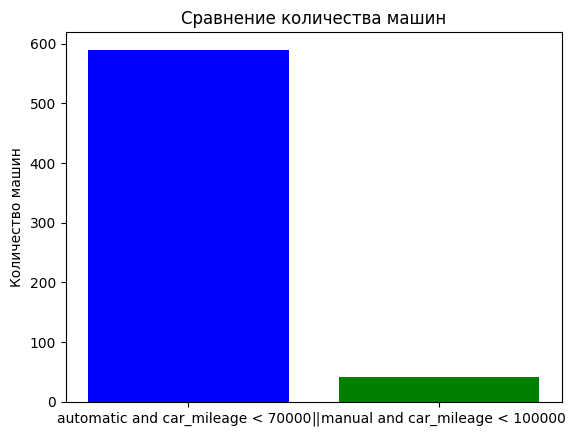

In [43]:
plt.bar(conditions, counts, color = ['blue', 'green'])
plt.ylabel('Количество машин')
plt.title('Сравнение количества машин')
plt.show()

Теперь на основе данной диограммы мы можем сделать вывод, что машины на автоматической коробке передач, с пробегом до 70000 популярнее чем на механичесекой коробке передач, с пробегом до 100000.